# Visualization of Bitcoin's daily performance

In [13]:
# install libraries
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install calplot
!pip install matplotlib

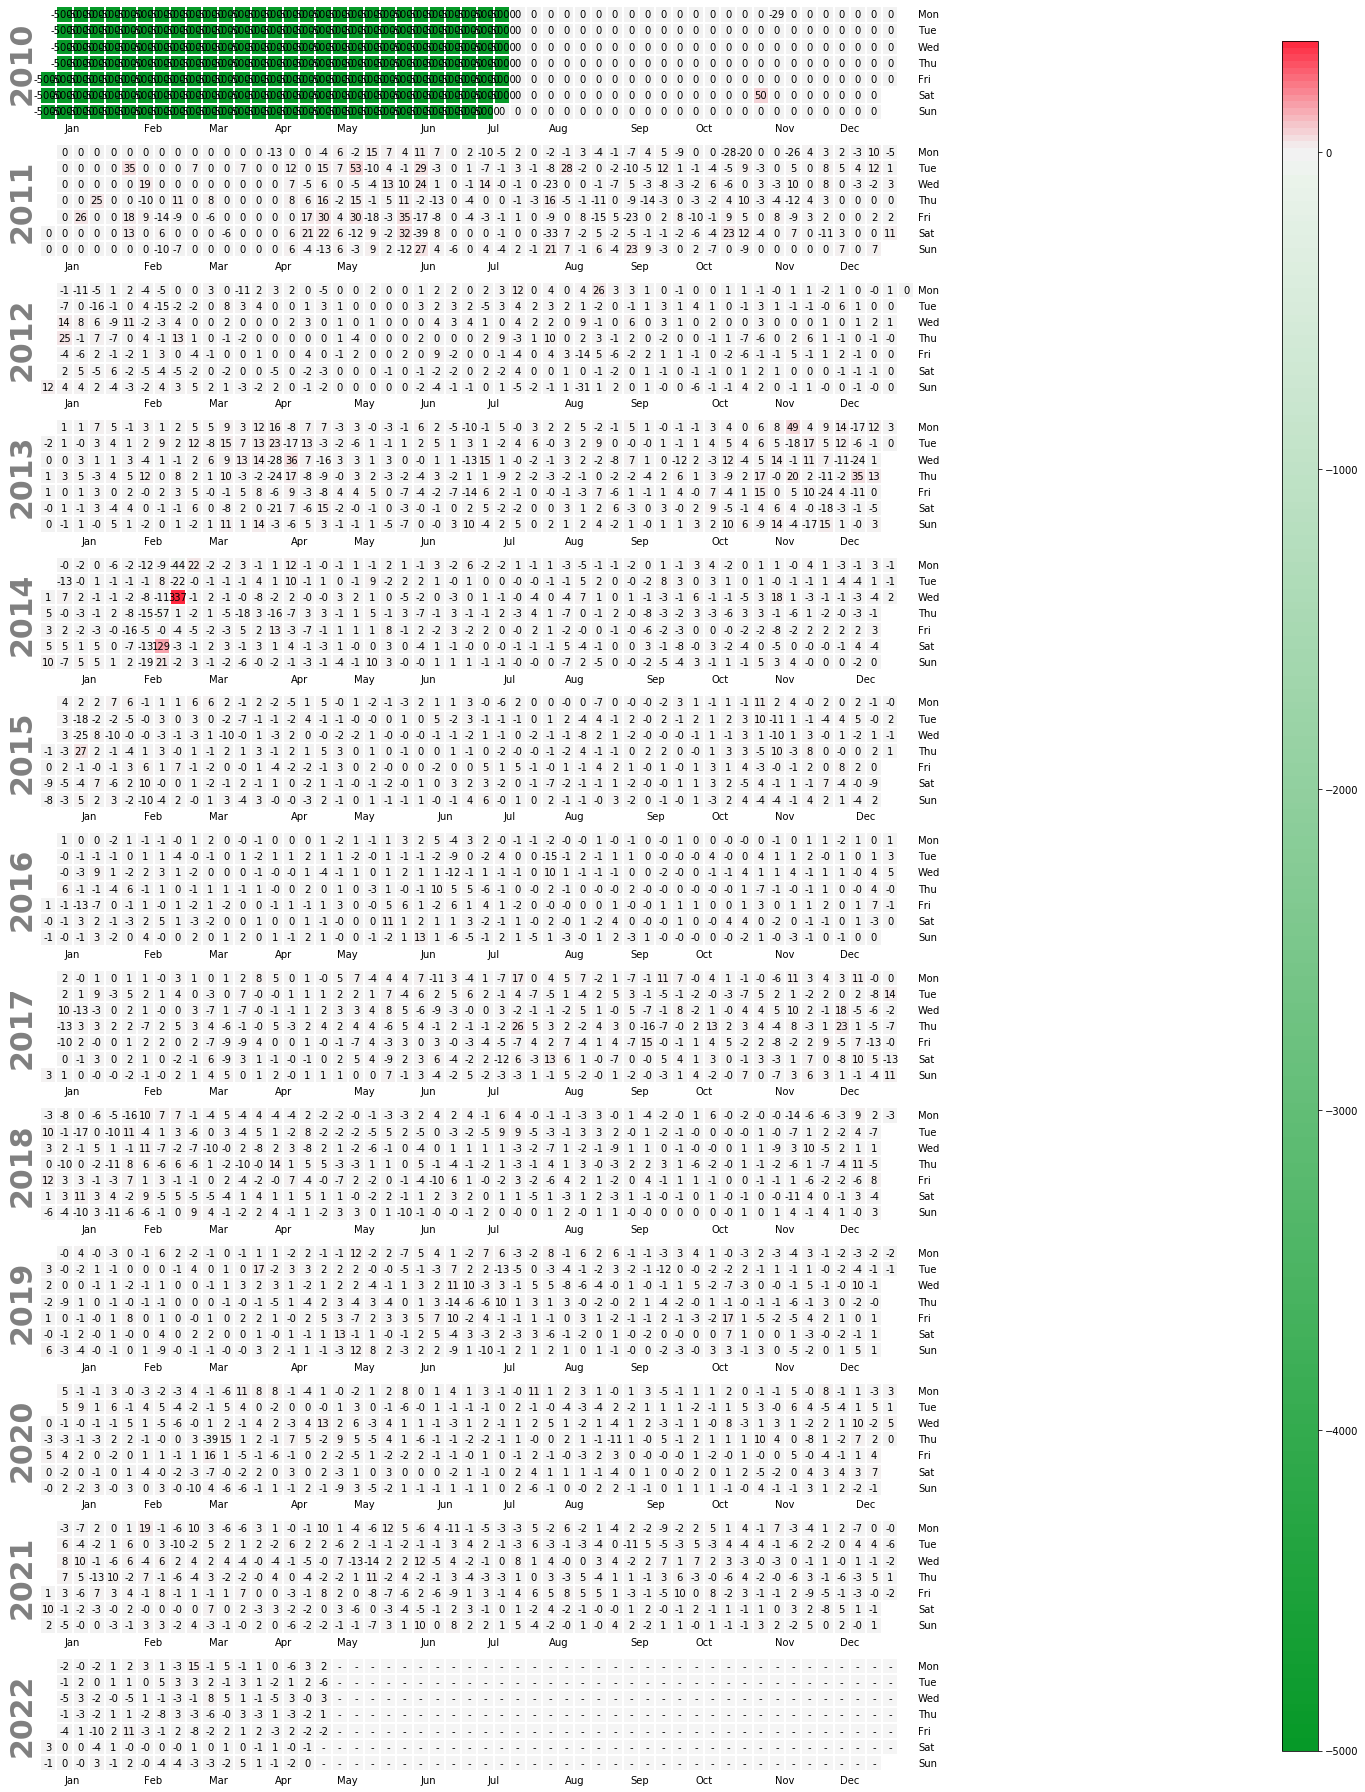

In [9]:
import os
import glob
import calplot
import itertools
import matplotlib
import numpy as np
import pylab as pl
import pandas as pd
import datetime as dt
import seaborn as sns


def load_data(fname):
    data = pd.read_csv(fname, parse_dates=["Date"])
    data.fillna(0)
    return data

def format_data(data):
    data['Date'] = pd.to_datetime(data["Date"])
    data['Price'] = data['Price'].apply(lambda row : float(str(row).replace(',','')))

def gen_combs():
    arr = []
    for e in itertools.combinations(range(1, 10), 3):
        for i, v in enumerate(e):
            if v > 0 or v < 1:
                e[i] = round(e[i]/10, 3)
            else :
               e[i] = int(v) 
        arr.append(e)
    return tuple(arr)

def format_tuple(e):
    l = []
    for i, v in enumerate(e):
        if e[i] == 0 or e[i] == 1:
            l.append(e[i])
        else:
            l.append(round(e[i]/10,3))
    print(l)
    return tuple(l)

        

def plot_data(data, col):    
    # reshape the data and plot it
    data = data.set_index('Date')
    
    # get color map 
    rdgn = sns.diverging_palette(h_neg=150, h_pos=10, s=99, l=55, sep=30, as_cmap=True)
    divnorm = matplotlib.colors.DivergingNorm(vmin=data[col].min(axis=0), vcenter=0, vmax=data[col].max(axis=0))
    
    """
    # scale
    min_val = data[col].min(axis=0)
    max_val = data[col].max(axis=0)
    data[col] = data[col].apply(lambda row: 2.*(row - min_val)/np.ptp(data[col].values)-1)
    print(data[col].values)
    """
    
    # creating custom colormap 
    l = ["green", "white", "#D3D3D3", "red"]
    custom_col = matplotlib.colors.LinearSegmentedColormap.from_list('rg',l, N=len(data[col]))
    rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, n=len(data[col]), as_cmap=True)
    divnorm = matplotlib.colors.DivergingNorm(vmin=data[col].min(), vcenter=0, vmax=data[col].max())
    
    # plot heatmap 
    calplot.calplot(data[col], 
                    edgecolor=None,
                    cmap=rdgn, 
                    norm=divnorm,
                    textformat='{:.0f}',
                    textfiller="-",
                    colorbar=True,
                    figsize=(25, 25))
    
data_list = []
for csv_file in sorted(glob.glob("/home/am/osp/SuperKogito.github.io/src/_static/btc_data/btc2*.csv")):
    data = load_data(csv_file)
    data_list.append(data)
    
data = pd.concat(data_list, axis=0)

format_data(data)
plot_data(data, col="Change")